In [2]:
import pandas as pd
import numpy as np
import pickle

def save_pkl(data, path):
    with open(path, 'wb') as ww:
        pickle.dump(data, ww)
        
def load_pkl(path):
    with open(path, 'rb') as rr:
        data = pickle.load(rr)
    return data

## Read CSV & Convert Type

In [3]:
london_07_10 = pd.read_csv("case3_start_rent/london_07_10.csv")
london_13_16 = pd.read_csv("case3_start_rent/london_13_16.csv")
london_17_20 = pd.read_csv("case3_start_rent/london_17_20.csv")

In [4]:
# convert type to float of `start_station_id` & `end_station_id`
london_07_10['start_station_id'] = london_07_10['start_station_id'].astype('float')
london_07_10['end_station_id'] = london_07_10['end_station_id'].astype('float')

london_13_16['start_station_id'] = london_13_16['start_station_id'].astype('float')
london_13_16['end_station_id'] = london_13_16['end_station_id'].astype('float')

london_17_20['start_station_id'] = london_17_20['start_station_id'].astype('float')
london_17_20['end_station_id'] = london_17_20['end_station_id'].astype('float')

## Group by Local

In [5]:
geostations = load_pkl('./geostations.pkl')

In [6]:
geostations.head()

station_id                          station_name  longitude  latitude  \
0           1             River Street, Clerkenwell  -0.109971   51.5292   
1           2        Phillimore Gardens, Kensington  -0.197574   51.4996   
2           3  Christopher Street, Liverpool Street  -0.084606   51.5213   
3           4       St. Chad's Street, King's Cross  -0.120974   51.5301   
4           5         Sedding Street, Sloane Square  -0.156876   51.4931   

   label  
0     28  
1     24  
2     29  
3     26  
4     24

In [7]:
## local number 11, 25
geostations_no_11 = geostations.query("label == 11")
geostations_no_25 = geostations.query("label == 25")

In [8]:
# Get `station id` located in local no.11, no.25
local_11_station_id = list(geostations_no_11['station_id'].values) 
local_25_station_id= list(geostations_no_25['station_id'].values)

## Groub by Local > Start rental time

### 07:00 ~ 10:00

In [9]:
# local no 11
london_07_10_local_11 = london_07_10[london_07_10.start_station_id.isin(local_11_station_id)]

# local no 25
london_07_10_local_25 = london_07_10[london_07_10.start_station_id.isin(local_25_station_id)]

### 13:00 ~ 16:00

In [10]:
# local no 11
london_13_16_local_11 = london_13_16[london_13_16.start_station_id.isin(local_11_station_id)]

# local no 25
london_13_16_local_25 = london_13_16[london_13_16.start_station_id.isin(local_25_station_id)]

### 17:00 ~ 20:00

In [11]:
# local no 11
london_17_20_local_11 = london_17_20[london_17_20.start_station_id.isin(local_11_station_id)]

# local no 25
london_17_20_local_25 = london_17_20[london_17_20.start_station_id.isin(local_25_station_id)]

## Groub by Local > Start rental time > COVID

In [12]:
def covid_divide(data):
    data_entire = data
    data_before = data.query("start_rental_date_time >= '2019-01-01' and start_rental_date_time < '2019-09-01'")
    data_after = data.query("start_rental_date_time >= '2020-01-01' and start_rental_date_time < '2020-09-01'")

    return data_entire, data_before, data_after

In [13]:
london_07_10_local_11, london_07_10_local_11_bc, london_07_10_local_11_ac = covid_divide(london_07_10_local_11)
london_13_16_local_11, london_13_16_local_11_bc, london_13_16_local_11_ac = covid_divide(london_13_16_local_11)
london_17_20_local_11, london_17_20_local_11_bc, london_17_20_local_11_ac = covid_divide(london_17_20_local_11)

london_07_10_local_25, london_07_10_local_25_bc, london_07_10_local_25_ac = covid_divide(london_07_10_local_25)
london_13_16_local_25, london_13_16_local_25_bc, london_13_16_local_25_ac = covid_divide(london_13_16_local_25)
london_17_20_local_25, london_17_20_local_25_bc, london_17_20_local_25_ac = covid_divide(london_17_20_local_25)

## Create Co_occurence matrix 

###  By Start rental time

In [14]:
co_matrix_london_07_10 = pd.crosstab(london_07_10['start_station_id'], london_07_10['end_station_id'])
co_matrix_london_13_16 = pd.crosstab(london_13_16['start_station_id'], london_13_16['end_station_id'])
co_matrix_london_17_20 = pd.crosstab(london_17_20['start_station_id'], london_17_20['end_station_id'])

In [15]:
co_matrix_london_07_10.to_csv("case3_start_rent/co_matrix_london_07_10.csv")
co_matrix_london_13_16.to_csv("case3_start_rent/co_matrix_london_13_16.csv")
co_matrix_london_17_20.to_csv("case3_start_rent/co_matrix_london_17_20.csv")

###  07:00 ~ 10:00

#### +  local no.

In [16]:
co_matrix_london_07_10_local_11 = pd.crosstab(london_07_10_local_11['start_station_id'], london_07_10_local_11['end_station_id'])
co_matrix_london_07_10_local_25 = pd.crosstab(london_07_10_local_25['start_station_id'], london_07_10_local_25['end_station_id'])

In [17]:
co_matrix_london_07_10_local_11.to_csv("case3_start_rent/co_matrix_london_07_10_local_11.csv")
co_matrix_london_07_10_local_25.to_csv("case3_start_rent/co_matrix_london_07_10_local_25.csv")

#### + BC

In [18]:
co_matrix_london_07_10_local_11_bc = pd.crosstab(london_07_10_local_11_bc['start_station_id'], london_07_10_local_11_bc['end_station_id'])
co_matrix_london_07_10_local_25_bc = pd.crosstab(london_07_10_local_25_bc['start_station_id'], london_07_10_local_25_bc['end_station_id'])

In [19]:
co_matrix_london_07_10_local_11_bc.to_csv("case3_start_rent/co_matrix_london_07_10_local_11_bc.csv")
co_matrix_london_07_10_local_25_bc.to_csv("case3_start_rent/co_matrix_london_07_10_local_25_bc.csv")

#### + AC

In [20]:
co_matrix_london_07_10_local_11_ac = pd.crosstab(london_07_10_local_11_ac['start_station_id'], london_07_10_local_11_ac['end_station_id'])
co_matrix_london_07_10_local_25_ac = pd.crosstab(london_07_10_local_25_ac['start_station_id'], london_07_10_local_25_ac['end_station_id'])

In [21]:
co_matrix_london_07_10_local_11_ac.to_csv("case3_start_rent/co_matrix_london_07_10_local_11_ac.csv")
co_matrix_london_07_10_local_25_ac.to_csv("case3_start_rent/co_matrix_london_07_10_local_25_ac.csv")

###  13:00 ~ 16:00

#### +  local no.

In [22]:
co_matrix_london_13_16_local_11 = pd.crosstab(london_13_16_local_11['start_station_id'], london_13_16_local_11['end_station_id'])
co_matrix_london_13_16_local_25 = pd.crosstab(london_13_16_local_25['start_station_id'], london_13_16_local_25['end_station_id'])

In [23]:
co_matrix_london_13_16_local_11.to_csv("case3_start_rent/co_matrix_london_13_16_local_11.csv")
co_matrix_london_13_16_local_25.to_csv("case3_start_rent/co_matrix_london_13_16_local_25.csv")

#### + BC

In [24]:
co_matrix_london_13_16_local_11_bc = pd.crosstab(london_13_16_local_11_bc['start_station_id'], london_13_16_local_11_bc['end_station_id'])
co_matrix_london_13_16_local_25_bc = pd.crosstab(london_13_16_local_25_bc['start_station_id'], london_13_16_local_25_bc['end_station_id'])

In [25]:
co_matrix_london_13_16_local_11_bc.to_csv("case3_start_rent/co_matrix_london_13_16_local_11_bc.csv")
co_matrix_london_13_16_local_25_bc.to_csv("case3_start_rent/co_matrix_london_13_16_local_25_bc.csv")

#### + AC

In [26]:
co_matrix_london_13_16_local_11_ac = pd.crosstab(london_13_16_local_11_ac['start_station_id'], london_13_16_local_11_ac['end_station_id'])
co_matrix_london_13_16_local_25_ac = pd.crosstab(london_13_16_local_25_ac['start_station_id'], london_13_16_local_25_ac['end_station_id'])

In [27]:
co_matrix_london_13_16_local_11_ac.to_csv("case3_start_rent/co_matrix_london_13_16_local_11_ac.csv")
co_matrix_london_13_16_local_25_ac.to_csv("case3_start_rent/co_matrix_london_13_16_local_25_ac.csv")

###  17:00 ~ 20:00

#### +  local no.

In [28]:
co_matrix_london_17_20_local_11 = pd.crosstab(london_17_20_local_11['start_station_id'], london_17_20_local_11['end_station_id'])
co_matrix_london_17_20_local_25 = pd.crosstab(london_17_20_local_25['start_station_id'], london_17_20_local_25['end_station_id'])

In [29]:
co_matrix_london_17_20_local_11.to_csv("case3_start_rent/co_matrix_london_17_20_local_11.csv")
co_matrix_london_17_20_local_25.to_csv("case3_start_rent/co_matrix_london_17_20_local_25.csv")

#### + BC

In [30]:
co_matrix_london_17_20_local_11_bc = pd.crosstab(london_17_20_local_11_bc['start_station_id'], london_17_20_local_11_bc['end_station_id'])
co_matrix_london_17_20_local_25_bc = pd.crosstab(london_17_20_local_25_bc['start_station_id'], london_17_20_local_25_bc['end_station_id'])

In [31]:
co_matrix_london_17_20_local_11_bc.to_csv("case3_start_rent/co_matrix_london_17_20_local_11_bc.csv")
co_matrix_london_17_20_local_25_bc.to_csv("case3_start_rent/co_matrix_london_17_20_local_25_bc.csv")

#### + AC

In [32]:
co_matrix_london_17_20_local_11_ac = pd.crosstab(london_17_20_local_11_ac['start_station_id'], london_17_20_local_11_ac['end_station_id'])
co_matrix_london_17_20_local_25_ac = pd.crosstab(london_17_20_local_25_ac['start_station_id'], london_17_20_local_25_ac['end_station_id'])

In [33]:
co_matrix_london_17_20_local_11_ac.to_csv("case3_start_rent/co_matrix_london_17_20_local_11_ac.csv")
co_matrix_london_17_20_local_25_ac.to_csv("case3_start_rent/co_matrix_london_17_20_local_25_ac.csv")

## Community detection

In [36]:
!pip install python-louvain
from community import community_louvain

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 204 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 9.8 MB/s eta 0:00:01
  Created wheel for python-louvain: filename=python_louvain-0.15-py3-none-any.whl size=9238 sha256=1b4688a44e03262adc0fcd2959207a1dcd3e7f7e18279024e92df17583bd1877
  Stored in directory: /home/subinkim/.cache/pip/wheels/9b/69/7c/a710d79e0174abd8b0e154d1360604eb125a86b5053f68cacd
Successfully built python-louvain
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [37]:
from community import community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx
from copy import deepcopy

In [38]:
def get_edge(co_matrix, from_, to_):
    
    row_boolean = co_matrix['start_station_id'] == from_
    
    value = co_matrix[row_boolean][str(float(to_))].values[0]
    
    return value

In [47]:
class community_detection:
    def __init__(self):
        print('Object for COMMUNITY DETECTION')
        
    def fit(self, co_matrix_path):
        self.co_matrix = pd.read_csv(co_matrix_path)

        nodes = [id_ for id_ in self.co_matrix['start_station_id']]
        edges = [[from_, to_, self.get_edge(from_, to_)] for from_ in nodes for to_ in nodes]
        node_and_edge = {'nodes' : nodes, 'edges' : edges}


        df = pd.DataFrame(node_and_edge['edges'], columns =['from', 'to', 'value'], dtype=int)

        df_edges = deepcopy(df)
        df_edges = df_edges.rename(columns = {'from' : 'source', 'to' : 'target'})


        edges = df_edges[['source','target']].values.tolist()
        weights = [float(l) for l in df_edges.value.values.tolist()]

        G = nx.Graph(directed=True)
        G.add_edges_from(edges)
    
        for cnt, a in enumerate(G.edges(data=True)):
            G.edges[(a[0], a[1])]['weight'] = weights[cnt]

        self.nodes = nodes
                
        return G, df_edges

    def make_plot(self, G):
        # compute the best partition
        self.partition = community_louvain.best_partition(G)

        fig = plt.figure(figsize=(20,10))

        # draw the graph
        pos = nx.spring_layout(G)
        # color the nodes according to their partition
        cmap = cm.get_cmap('viridis', max(self.partition.values()) + 1)
        nx.draw_networkx_nodes(G, pos, self.partition.keys(), node_size=40,
                            cmap=cmap, node_color=list(self.partition.values()))
        nx.draw_networkx_edges(G, pos, alpha=0.5)
        plt.show()


    def node_per_class(self):
        node_per_class = {i : [] for i in range(8)}
        for i in self.nodes:
            for cls in range(8):
                if self.partition[int(i)] == cls:
                    node_per_class[cls].append(i)
        print(node_per_class)
        return node_per_class
  
    def get_edge(self, from_, to_):
    
        row_boolean = self.co_matrix['start_station_id'] == from_
        value = self.co_matrix[row_boolean][str(float(to_))].values[0]
        
        return value

In [40]:
co_mat_paths_local_11 = ["case3_start_rent/co_matrix_london_07_10_local_11_bc.csv", "case3_start_rent/co_matrix_london_07_10_local_11_ac.csv", 
                         "case3_start_rent/co_matrix_london_13_16_local_11_bc.csv", "case3_start_rent/co_matrix_london_13_16_local_11_ac.csv",
                         "case3_start_rent/co_matrix_london_17_20_local_11_bc.csv", "case3_start_rent/co_matrix_london_17_20_local_11_ac.csv"]
co_mat_paths_local_25 = ["case3_start_rent/co_matrix_london_07_10_local_25_bc.csv", "case3_start_rent/co_matrix_london_07_10_local_25_ac.csv",
                         "case3_start_rent/co_matrix_london_13_16_local_25_bc.csv", "case3_start_rent/co_matrix_london_13_16_local_25_ac.csv",
                         "case3_start_rent/co_matrix_london_17_20_local_25_bc.csv", "case3_start_rent/co_matrix_london_17_20_local_25_ac.csv",]

In [41]:
co_matrix_london_07_10_local_11 = pd.read_csv("case3_start_rent/co_matrix_london_07_10_local_11.csv")
co_matrix_london_13_16_local_11 = pd.read_csv("case3_start_rent/co_matrix_london_13_16_local_11.csv")
co_matrix_london_17_20_local_11 = pd.read_csv("case3_start_rent/co_matrix_london_17_20_local_11.csv")

co_matrix_london_07_10_local_25 = pd.read_csv("case3_start_rent/co_matrix_london_07_10_local_25.csv")
co_matrix_london_13_16_local_25 = pd.read_csv("case3_start_rent/co_matrix_london_13_16_local_25.csv")
co_matrix_london_17_20_local_25 = pd.read_csv("case3_start_rent/co_matrix_london_17_20_local_25.csv")

### Local no.11

* 07:00 ~ 10:00

Object for COMMUNITY DETECTION


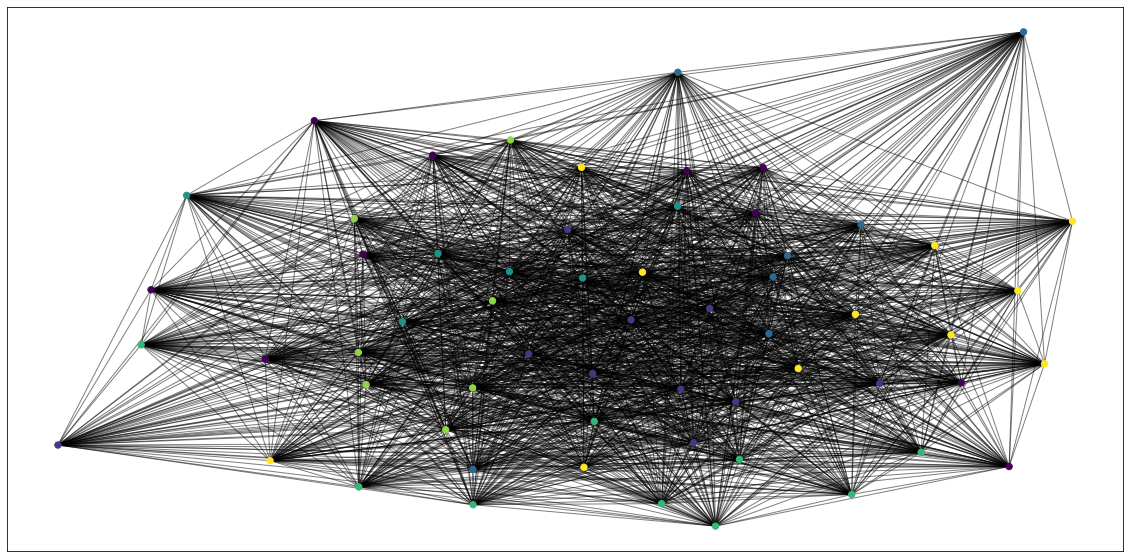

{0: [62.0, 139.0, 173.0, 252.0, 270.0, 355.0, 435.0, 602.0, 612.0, 833.0], 1: [74.0, 117.0, 273.0, 310.0, 387.0, 412.0, 437.0, 441.0, 772.0, 802.0], 2: [86.0, 197.0, 284.0, 336.0, 361.0, 440.0, 808.0], 3: [91.0, 100.0, 334.0, 347.0, 371.0, 603.0], 4: [149.0, 272.0, 624.0, 630.0, 641.0, 813.0, 814.0, 815.0, 819.0], 5: [305.0, 352.0, 374.0, 377.0, 676.0, 794.0, 829.0], 6: [144.0, 154.0, 600.0, 654.0, 669.0, 677.0, 827.0, 828.0, 830.0, 831.0, 832.0], 7: []}


In [48]:
# bc
co_matrix_path = co_mat_paths_local_11[0]
detector = community_detection()
G_071011_bc, edges_info_071011_bc = detector.fit(co_matrix_path)
detector.make_plot(G_071011_bc)
node_per_class_071011_bc = detector.node_per_class()

Object for COMMUNITY DETECTION


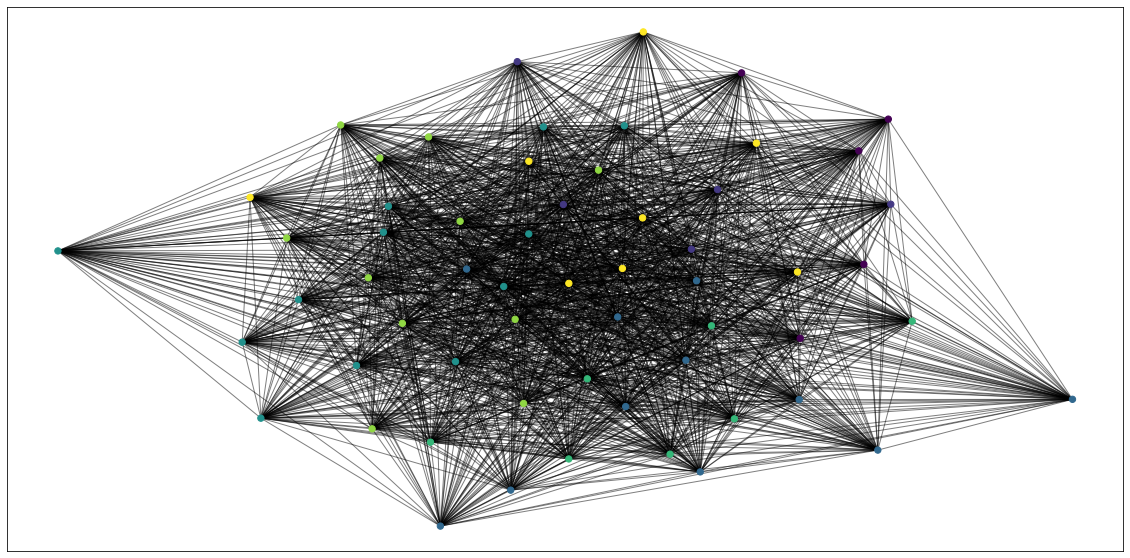

{0: [62.0, 252.0, 270.0, 437.0, 641.0], 1: [74.0, 86.0, 441.0, 602.0, 828.0], 2: [91.0, 139.0, 154.0, 334.0, 630.0, 654.0, 814.0, 819.0, 829.0, 831.0, 833.0], 3: [100.0, 117.0, 149.0, 173.0, 197.0, 310.0, 361.0, 377.0, 412.0, 440.0, 612.0, 772.0], 4: [272.0, 347.0, 802.0, 808.0, 815.0, 827.0, 832.0], 5: [144.0, 336.0, 387.0, 435.0, 600.0, 603.0, 669.0, 676.0, 677.0, 794.0, 830.0], 6: [273.0, 284.0, 352.0, 355.0, 371.0, 374.0, 624.0, 813.0], 7: []}


In [49]:
# ac
co_matrix_path = co_mat_paths_local_11[1]
detector = community_detection()
G_071011_ac, edges_info_071011_ac = detector.fit(co_matrix_path)
detector.make_plot(G_071011_ac)
node_per_class_071011_ac = detector.node_per_class()

In [51]:
node_per_class_071011_ac

{0: [62.0, 252.0, 270.0, 437.0, 641.0],
 1: [74.0, 86.0, 441.0, 602.0, 828.0],
 2: [91.0,
  139.0,
  154.0,
  334.0,
  630.0,
  654.0,
  814.0,
  819.0,
  829.0,
  831.0,
  833.0],
 3: [100.0,
  117.0,
  149.0,
  173.0,
  197.0,
  310.0,
  361.0,
  377.0,
  412.0,
  440.0,
  612.0,
  772.0],
 4: [272.0, 347.0, 802.0, 808.0, 815.0, 827.0, 832.0],
 5: [144.0,
  336.0,
  387.0,
  435.0,
  600.0,
  603.0,
  669.0,
  676.0,
  677.0,
  794.0,
  830.0],
 6: [273.0, 284.0, 352.0, 355.0, 371.0, 374.0, 624.0, 813.0],
 7: []}

In [50]:
edges_info_071011_ac.head()

source  target  value
0      62      62     17
1      62      74      5
2      62      86      4
3      62      91      4
4      62     100      0

* 13:00 ~ 16:00

Object for COMMUNITY DETECTION


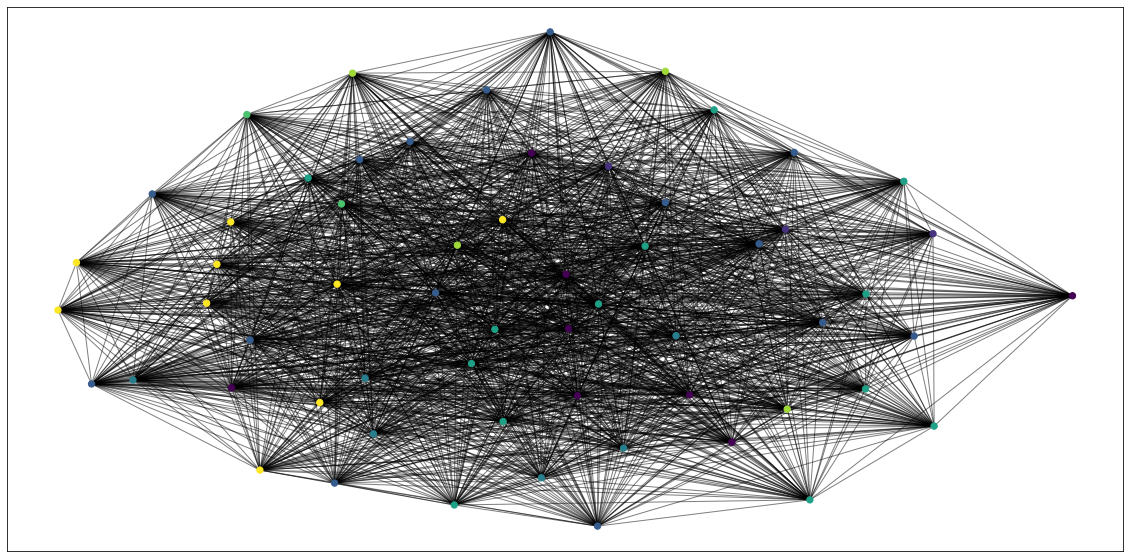

{0: [154.0, 197.0, 284.0, 347.0, 355.0, 435.0, 440.0, 813.0], 1: [377.0, 630.0, 815.0], 2: [62.0, 91.0, 270.0, 273.0, 305.0, 310.0, 334.0, 361.0, 603.0, 641.0, 676.0, 828.0, 829.0, 831.0, 833.0], 3: [100.0, 272.0, 437.0, 808.0, 814.0, 819.0], 4: [74.0, 86.0, 117.0, 139.0, 173.0, 252.0, 336.0, 387.0, 412.0, 441.0, 600.0, 612.0, 794.0], 5: [624.0, 802.0], 6: [144.0, 602.0, 654.0, 669.0], 7: [149.0, 352.0, 371.0, 374.0, 677.0, 772.0, 827.0, 830.0, 832.0]}


In [52]:
# bc
co_matrix_path = co_mat_paths_local_11[2]
detector = community_detection()
G_131611_bc, edges_info_131611_bc = detector.fit(co_matrix_path)
detector.make_plot(G_131611_bc)
node_per_class_131611_bc = detector.node_per_class()

Object for COMMUNITY DETECTION


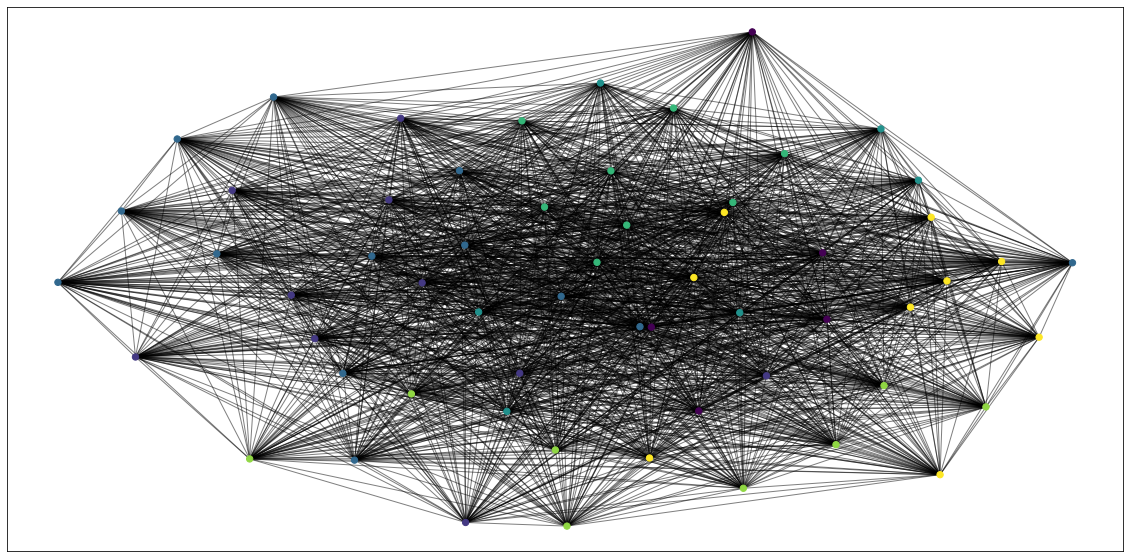

{0: [149.0, 270.0, 641.0, 772.0, 814.0], 1: [139.0, 173.0, 336.0, 352.0, 355.0, 387.0, 435.0, 602.0, 624.0, 794.0], 2: [91.0, 154.0, 197.0, 252.0, 273.0, 284.0, 310.0, 361.0, 371.0, 377.0, 437.0, 441.0, 630.0], 3: [100.0, 272.0, 440.0, 802.0, 808.0, 828.0], 4: [74.0, 86.0, 117.0, 347.0, 374.0, 412.0, 600.0, 815.0], 5: [62.0, 334.0, 654.0, 819.0, 829.0, 831.0, 832.0, 833.0], 6: [144.0, 603.0, 612.0, 669.0, 676.0, 677.0, 813.0, 827.0, 830.0], 7: []}


In [53]:
# ac
co_matrix_path = co_mat_paths_local_11[3]
detector = community_detection()
G_131611_ac, edges_info_131611_ac = detector.fit(co_matrix_path)
detector.make_plot(G_131611_ac)
node_per_class_131611_ac = detector.node_per_class()

* 17:00 ~ 20:00

Object for COMMUNITY DETECTION


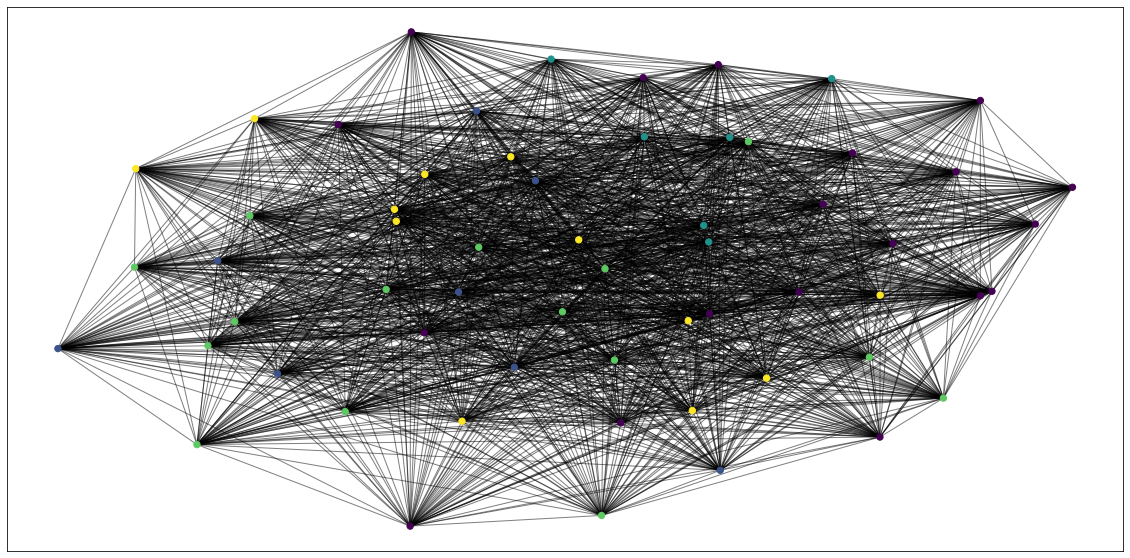

{0: [74.0, 86.0, 91.0, 117.0, 139.0, 154.0, 173.0, 252.0, 334.0, 336.0, 387.0, 412.0, 435.0, 437.0, 441.0, 602.0, 612.0, 641.0, 794.0], 1: [62.0, 149.0, 270.0, 371.0, 377.0, 630.0, 677.0, 815.0], 2: [272.0, 772.0, 802.0, 808.0, 814.0, 819.0], 3: [144.0, 273.0, 305.0, 310.0, 374.0, 603.0, 654.0, 669.0, 676.0, 827.0, 828.0, 829.0, 830.0, 832.0, 833.0], 4: [100.0, 197.0, 284.0, 347.0, 352.0, 355.0, 361.0, 440.0, 600.0, 624.0, 813.0, 831.0], 5: [], 6: [], 7: []}


In [54]:
# bc
co_matrix_path = co_mat_paths_local_11[4]
detector = community_detection()
G_172011_bc, edges_info_172011_bc = detector.fit(co_matrix_path)
detector.make_plot(G_172011_bc)
node_per_class_172011_bc = detector.node_per_class()

Object for COMMUNITY DETECTION


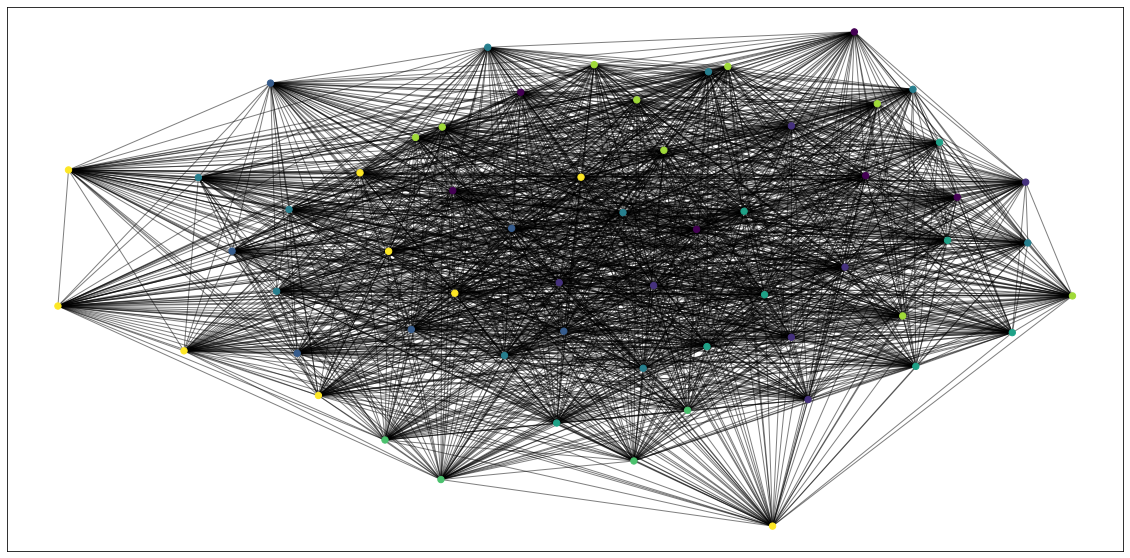

{0: [62.0, 149.0, 270.0, 352.0, 641.0, 772.0], 1: [74.0, 86.0, 117.0, 347.0, 412.0, 802.0, 808.0], 2: [91.0, 154.0, 336.0, 377.0, 435.0, 630.0], 3: [273.0, 334.0, 600.0, 624.0, 677.0, 827.0, 829.0, 830.0, 831.0, 833.0], 4: [144.0, 355.0, 387.0, 603.0, 612.0, 669.0, 676.0, 794.0], 5: [139.0, 252.0, 437.0, 602.0], 6: [100.0, 272.0, 440.0, 654.0, 813.0, 814.0, 819.0, 828.0, 832.0], 7: [173.0, 197.0, 284.0, 310.0, 361.0, 371.0, 374.0, 441.0, 815.0]}


In [55]:
# ac
co_matrix_path = co_mat_paths_local_11[5]
detector = community_detection()
G_172011_ac, edges_info_172011_ac = detector.fit(co_matrix_path)
detector.make_plot(G_172011_ac)
node_per_class_172011_ac = detector.node_per_class()

### Local no.25

* 07:00 ~ 10:00

Object for COMMUNITY DETECTION


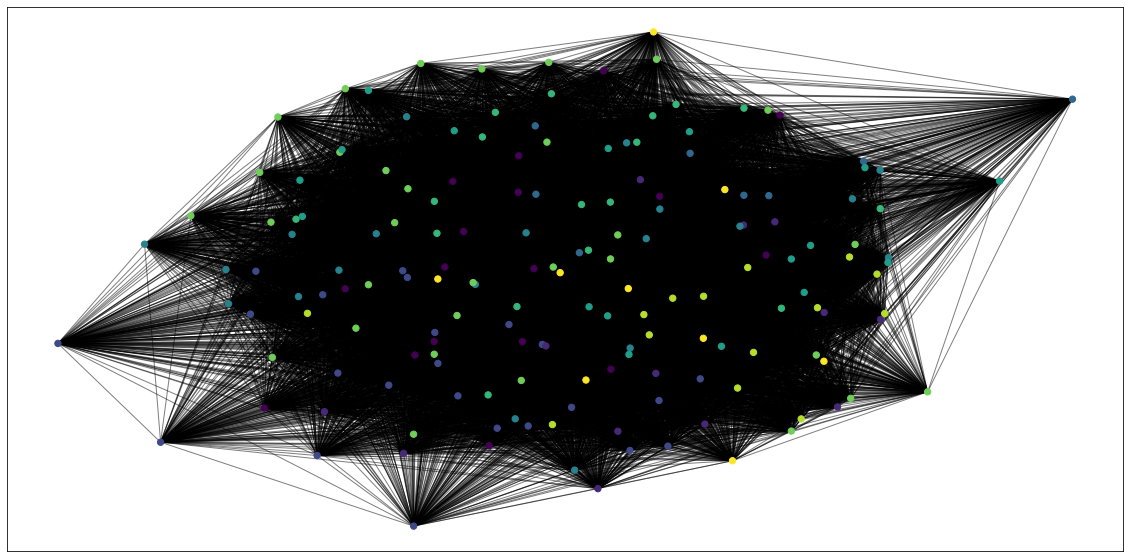

{0: [6.0, 45.0, 161.0, 165.0, 177.0, 184.0, 210.0, 243.0, 261.0, 291.0, 292.0, 373.0, 383.0, 389.0, 408.0, 410.0, 594.0], 1: [56.0, 64.0, 188.0, 207.0, 258.0, 283.0, 289.0, 341.0, 353.0, 392.0, 394.0, 558.0, 568.0], 2: [8.0, 43.0, 44.0, 53.0, 81.0, 138.0, 176.0, 180.0, 192.0, 221.0, 229.0, 247.0, 248.0, 268.0, 271.0, 290.0, 312.0, 335.0, 338.0, 359.0, 376.0, 380.0, 733.0], 3: [28.0, 47.0, 60.0, 83.0, 121.0, 159.0, 309.0, 318.0], 4: [29.0, 105.0, 116.0, 118.0, 124.0, 129.0, 141.0, 148.0, 169.0, 186.0, 301.0, 303.0, 313.0, 354.0, 382.0, 386.0, 419.0, 590.0, 605.0, 760.0], 5: [7.0, 99.0, 114.0, 146.0, 153.0, 160.0, 233.0, 260.0, 286.0, 294.0, 330.0, 397.0, 514.0, 541.0, 581.0, 583.0, 799.0], 6: [82.0, 111.0, 182.0, 190.0, 213.0, 222.0, 300.0, 315.0, 325.0, 350.0, 366.0, 370.0, 403.0, 424.0, 524.0, 584.0, 759.0], 7: [49.0, 106.0, 108.0, 109.0, 110.0, 164.0, 167.0, 174.0, 178.0, 185.0, 201.0, 238.0, 255.0, 257.0, 259.0, 265.0, 267.0, 279.0, 281.0, 288.0, 299.0, 306.0, 311.0, 348.0, 360.0, 4

In [56]:
# bc

co_matrix_path = co_mat_paths_local_25[0]
detector = community_detection()
G_071025_bc, edges_info_071025_bc = detector.fit(co_matrix_path)
detector.make_plot(G_071025_bc)
node_per_class_071025_bc = detector.node_per_class()

Object for COMMUNITY DETECTION


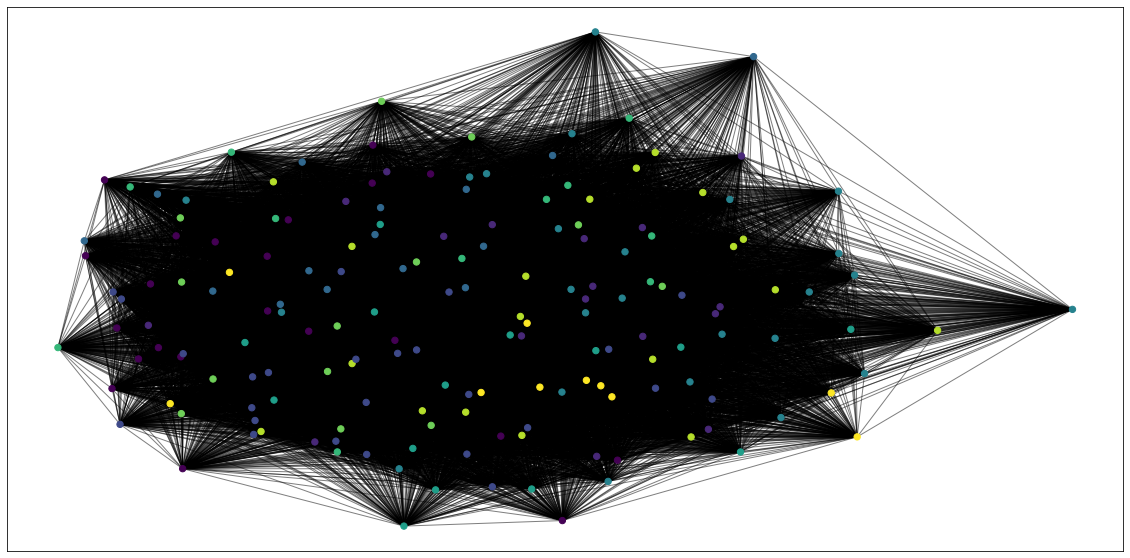

{0: [6.0, 45.0, 124.0, 159.0, 176.0, 178.0, 182.0, 184.0, 208.0, 255.0, 281.0, 335.0, 348.0, 349.0, 370.0, 383.0, 388.0, 400.0, 514.0, 524.0, 594.0, 760.0], 1: [64.0, 108.0, 141.0, 164.0, 191.0, 233.0, 248.0, 271.0, 288.0, 289.0, 301.0, 303.0, 311.0, 353.0, 363.0, 590.0, 733.0], 2: [28.0, 47.0, 56.0, 121.0, 177.0, 190.0, 221.0, 242.0, 306.0, 309.0, 312.0, 320.0, 329.0, 330.0, 380.0, 394.0, 396.0, 408.0, 410.0, 426.0, 428.0, 581.0, 592.0, 759.0, 818.0], 3: [60.0, 83.0, 99.0, 106.0, 111.0, 161.0, 268.0, 315.0, 338.0, 367.0, 389.0, 392.0, 424.0, 564.0, 809.0], 4: [7.0, 8.0, 29.0, 43.0, 44.0, 49.0, 53.0, 82.0, 109.0, 116.0, 129.0, 138.0, 146.0, 186.0, 201.0, 207.0, 228.0, 238.0, 247.0, 256.0, 260.0, 313.0, 402.0, 568.0, 584.0], 5: [81.0, 105.0, 153.0, 210.0, 213.0, 224.0, 229.0, 261.0, 290.0, 354.0, 373.0, 403.0, 423.0, 826.0], 6: [110.0, 114.0, 118.0, 148.0, 232.0, 279.0, 292.0, 294.0, 325.0, 350.0, 558.0], 7: [160.0, 181.0, 188.0, 257.0, 258.0, 259.0, 366.0, 376.0, 419.0, 583.0, 605.0, 6

In [57]:
# ac

co_matrix_path = co_mat_paths_local_25[1]
detector = community_detection()
G_071025_ac, edges_info_071025_ac = detector.fit(co_matrix_path)
detector.make_plot(G_071025_ac)
node_per_class_071025_ac = detector.node_per_class()

* 13:00 ~ 16:00

Object for COMMUNITY DETECTION


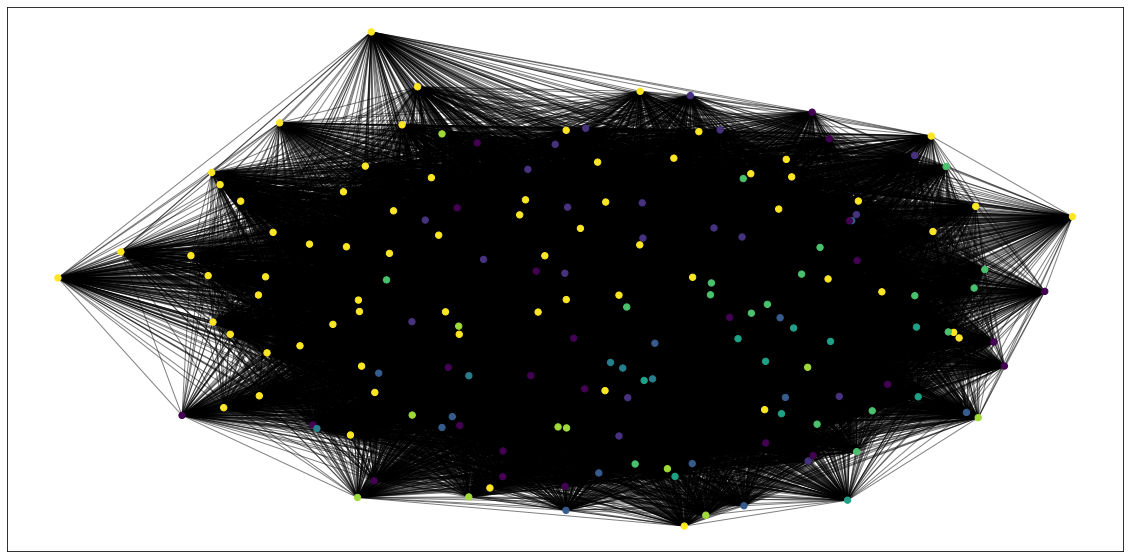

{0: [6.0, 56.0, 83.0, 148.0, 180.0, 184.0, 242.0, 247.0, 258.0, 271.0, 325.0, 329.0, 349.0, 353.0, 359.0, 367.0, 382.0, 383.0, 388.0, 428.0, 524.0, 558.0, 568.0, 581.0, 646.0], 1: [109.0, 116.0, 169.0, 181.0, 188.0, 213.0, 243.0, 267.0, 268.0, 279.0, 300.0, 312.0, 360.0, 366.0, 392.0, 410.0, 584.0, 592.0, 799.0, 826.0], 2: [118.0, 138.0, 161.0, 165.0, 207.0, 210.0, 245.0, 261.0, 301.0, 408.0, 594.0, 605.0], 3: [320.0, 354.0, 373.0, 528.0, 818.0], 4: [114.0, 233.0, 315.0, 338.0, 350.0, 397.0, 419.0, 424.0, 514.0, 583.0], 5: [64.0, 164.0, 238.0, 248.0, 257.0, 259.0, 292.0, 299.0, 306.0, 313.0, 341.0, 376.0, 380.0, 402.0, 426.0, 564.0, 733.0, 760.0], 6: [82.0, 260.0, 286.0, 288.0, 291.0, 294.0, 303.0, 348.0, 363.0, 590.0, 759.0], 7: [7.0, 8.0, 28.0, 29.0, 43.0, 44.0, 45.0, 47.0, 49.0, 53.0, 60.0, 81.0, 99.0, 105.0, 106.0, 108.0, 110.0, 111.0, 121.0, 124.0, 129.0, 141.0, 146.0, 153.0, 159.0, 160.0, 167.0, 174.0, 176.0, 177.0, 178.0, 182.0, 185.0, 186.0, 190.0, 191.0, 192.0, 201.0, 208.0, 2

In [58]:
# bc

co_matrix_path = co_mat_paths_local_25[2]
detector = community_detection()
G_131625_bc, edges_info_131625_bc = detector.fit(co_matrix_path)
detector.make_plot(G_131625_bc)
node_per_class_131625_bc = detector.node_per_class()

Object for COMMUNITY DETECTION


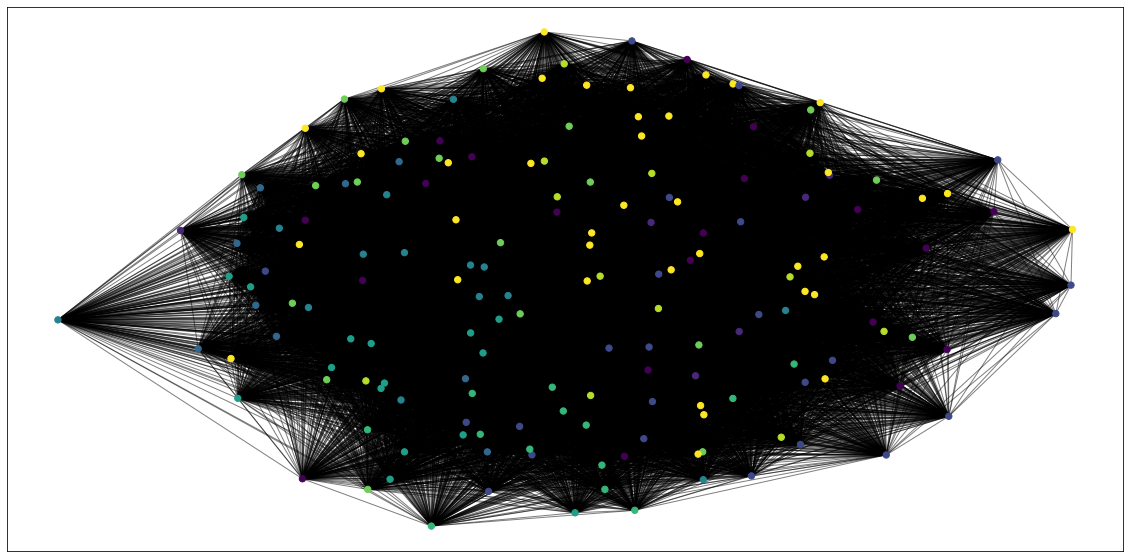

{0: [6.0, 7.0, 8.0, 43.0, 44.0, 53.0, 56.0, 64.0, 108.0, 111.0, 138.0, 201.0, 208.0, 313.0, 316.0, 338.0, 370.0, 376.0, 541.0, 799.0], 1: [47.0, 146.0, 177.0, 330.0, 394.0, 402.0], 2: [45.0, 82.0, 106.0, 116.0, 159.0, 161.0, 178.0, 180.0, 182.0, 184.0, 186.0, 188.0, 192.0, 207.0, 247.0, 255.0, 265.0, 294.0, 306.0, 349.0, 408.0, 524.0, 581.0, 646.0], 3: [181.0, 191.0, 318.0, 403.0, 419.0, 590.0, 594.0, 733.0, 760.0], 4: [83.0, 114.0, 176.0, 232.0, 258.0, 267.0, 311.0, 325.0, 348.0, 350.0, 382.0, 558.0, 568.0, 592.0], 5: [99.0, 213.0, 257.0, 283.0, 291.0, 335.0, 354.0, 383.0, 396.0, 528.0, 564.0, 583.0, 584.0, 605.0, 759.0, 826.0], 6: [190.0, 228.0, 261.0, 286.0, 299.0, 320.0, 367.0, 373.0, 388.0, 392.0, 400.0, 426.0, 818.0], 7: [110.0, 185.0, 233.0, 238.0, 256.0, 268.0, 279.0, 301.0, 303.0, 309.0, 312.0, 315.0, 353.0, 360.0, 389.0, 423.0, 514.0, 762.0, 809.0]}


In [59]:
# ac

co_matrix_path = co_mat_paths_local_25[3]
detector = community_detection()
G_131625_ac, edges_info_131625_ac = detector.fit(co_matrix_path)
detector.make_plot(G_131625_ac)
node_per_class_131625_ac = detector.node_per_class()

* 17:00 ~ 20:00

Object for COMMUNITY DETECTION


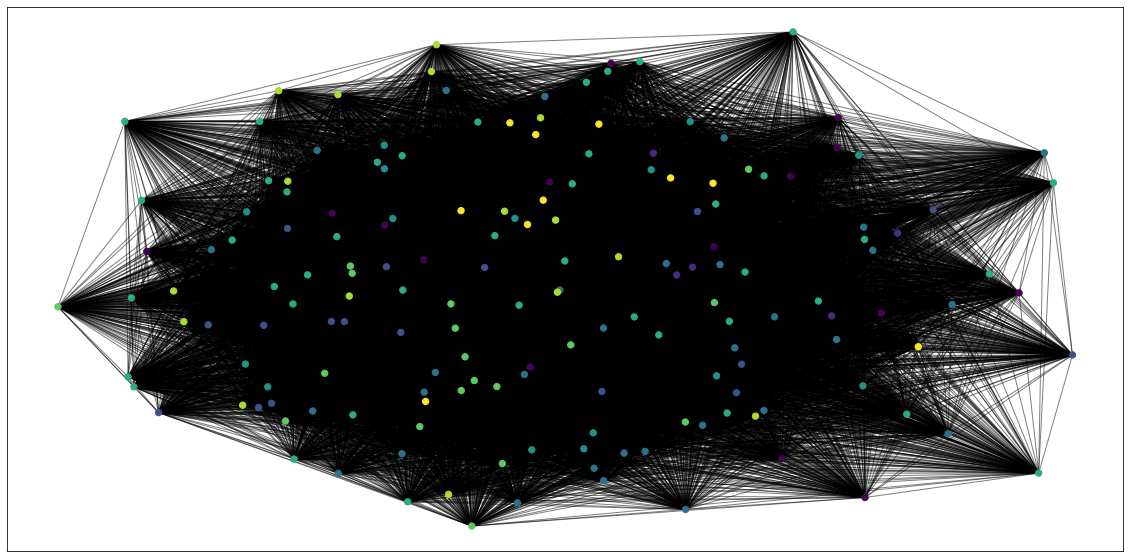

{0: [6.0, 47.0, 60.0, 118.0, 146.0, 161.0, 177.0, 247.0, 261.0, 267.0, 279.0, 335.0, 366.0, 410.0, 558.0], 1: [320.0, 354.0, 373.0, 528.0, 818.0], 2: [28.0, 49.0, 116.0, 124.0, 141.0, 169.0, 184.0, 186.0, 188.0, 213.0, 222.0, 268.0, 312.0, 349.0, 396.0, 403.0, 423.0], 3: [29.0, 45.0, 56.0, 81.0, 105.0, 106.0, 109.0, 121.0, 138.0, 174.0, 176.0, 190.0, 191.0, 192.0, 201.0, 207.0, 208.0, 221.0, 229.0, 242.0, 243.0, 256.0, 309.0, 329.0, 353.0, 370.0, 380.0, 389.0, 408.0, 541.0, 826.0], 4: [44.0, 148.0, 258.0, 265.0, 271.0, 382.0, 386.0, 394.0, 400.0, 524.0, 581.0, 590.0, 759.0, 762.0, 809.0], 5: [7.0, 8.0, 43.0, 53.0, 82.0, 108.0, 110.0, 111.0, 129.0, 159.0, 160.0, 165.0, 178.0, 181.0, 185.0, 210.0, 226.0, 232.0, 245.0, 248.0, 260.0, 281.0, 283.0, 286.0, 288.0, 289.0, 290.0, 291.0, 294.0, 300.0, 301.0, 303.0, 313.0, 318.0, 330.0, 348.0, 363.0, 367.0, 584.0, 594.0, 605.0, 799.0], 6: [64.0, 153.0, 164.0, 238.0, 255.0, 257.0, 259.0, 292.0, 299.0, 306.0, 341.0, 360.0, 392.0, 402.0, 426.0, 564.

In [60]:
# bc

co_matrix_path = co_mat_paths_local_25[4]
detector = community_detection()
G_172025_bc, edges_info_172025_bc = detector.fit(co_matrix_path)
detector.make_plot(G_172025_bc)
node_per_class_172025_bc = detector.node_per_class()

Object for COMMUNITY DETECTION


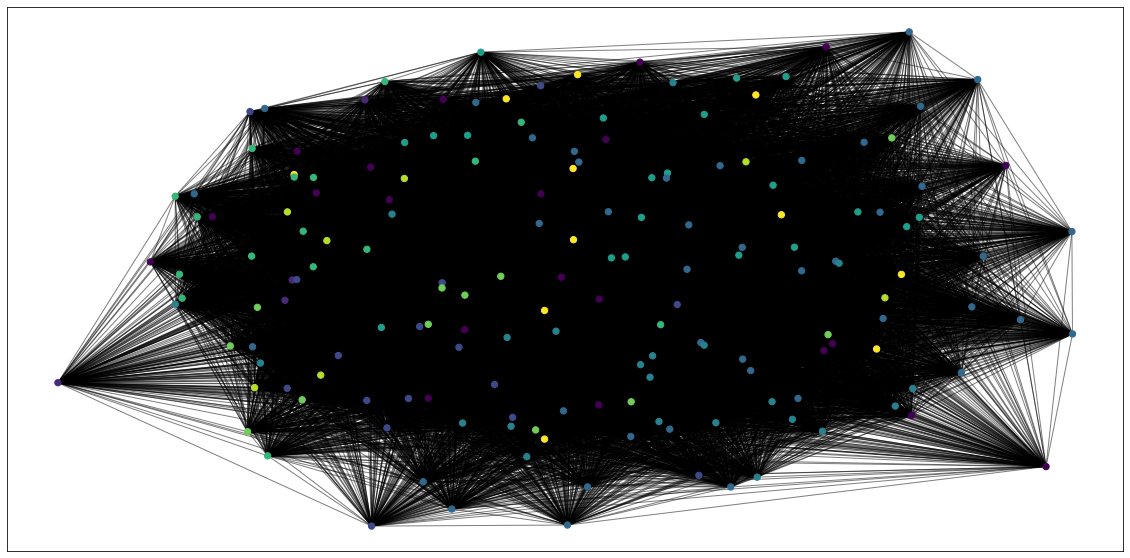

{0: [82.0, 106.0, 116.0, 161.0, 178.0, 180.0, 186.0, 207.0, 208.0, 222.0, 255.0, 265.0, 294.0, 306.0, 335.0, 349.0, 366.0, 370.0, 408.0, 581.0, 646.0], 1: [83.0, 114.0, 558.0, 592.0], 2: [56.0, 99.0, 160.0, 181.0, 213.0, 257.0, 291.0, 354.0, 383.0, 396.0, 419.0, 528.0, 541.0, 583.0, 759.0, 826.0], 3: [6.0, 7.0, 8.0, 28.0, 29.0, 43.0, 45.0, 49.0, 53.0, 60.0, 64.0, 81.0, 105.0, 108.0, 111.0, 124.0, 138.0, 141.0, 153.0, 159.0, 169.0, 174.0, 184.0, 192.0, 201.0, 226.0, 229.0, 247.0, 248.0, 271.0, 279.0, 283.0, 288.0, 290.0, 300.0, 313.0, 376.0, 397.0, 402.0, 423.0, 524.0, 799.0], 4: [44.0, 110.0, 129.0, 185.0, 233.0, 238.0, 256.0, 268.0, 301.0, 303.0, 309.0, 312.0, 315.0, 350.0, 353.0, 360.0, 389.0, 403.0, 514.0, 584.0, 762.0, 809.0], 5: [47.0, 109.0, 121.0, 146.0, 164.0, 165.0, 167.0, 177.0, 210.0, 221.0, 224.0, 259.0, 260.0, 281.0, 289.0, 329.0, 330.0, 380.0, 386.0, 394.0], 6: [182.0, 190.0, 228.0, 261.0, 286.0, 299.0, 316.0, 320.0, 338.0, 367.0, 373.0, 388.0, 392.0, 400.0, 426.0, 818.0]

In [61]:
# ac

co_matrix_path = co_mat_paths_local_25[5]
detector = community_detection()
G_172025_ac, edges_info_172025_ac = detector.fit(co_matrix_path)
detector.make_plot(G_172025_ac)
node_per_class_172025_ac = detector.node_per_class()

In [62]:
# node_per_class_xxxxxx
save_pkl(node_per_class_071011_bc, 'case3_start_rent/results/node_per_class_071011_bc.pkl')
save_pkl(node_per_class_131611_bc, 'case3_start_rent/results/node_per_class_131611_bc.pkl')
save_pkl(node_per_class_172011_bc, 'case3_start_rent/results/node_per_class_172011_bc.pkl')
save_pkl(node_per_class_071025_bc, 'case3_start_rent/results/node_per_class_071025_bc.pkl')
save_pkl(node_per_class_131625_bc, 'case3_start_rent/results/node_per_class_131625_bc.pkl')
save_pkl(node_per_class_172025_bc, 'case3_start_rent/results/node_per_class_172025_bc.pkl')

save_pkl(node_per_class_071011_ac, 'case3_start_rent/results/node_per_class_071011_ac.pkl')
save_pkl(node_per_class_131611_ac, 'case3_start_rent/results/node_per_class_131611_ac.pkl')
save_pkl(node_per_class_172011_ac, 'case3_start_rent/results/node_per_class_172011_ac.pkl')
save_pkl(node_per_class_071025_ac, 'case3_start_rent/results/node_per_class_071025_ac.pkl')
save_pkl(node_per_class_131625_ac, 'case3_start_rent/results/node_per_class_131625_ac.pkl')
save_pkl(node_per_class_172025_ac, 'case3_start_rent/results/node_per_class_172025_ac.pkl')

# edges_info_xxxxxx
save_pkl(edges_info_071011_bc, 'case3_start_rent/results/edges_info_071011_bc.pkl')
save_pkl(edges_info_131611_bc, 'case3_start_rent/results/edges_info_131611_bc.pkl')
save_pkl(edges_info_172011_bc, 'case3_start_rent/results/edges_info_172011_bc.pkl')
save_pkl(edges_info_071025_bc, 'case3_start_rent/results/edges_info_071025_bc.pkl')
save_pkl(edges_info_131625_bc, 'case3_start_rent/results/edges_info_131625_bc.pkl')
save_pkl(edges_info_172025_bc, 'case3_start_rent/results/edges_info_172025_bc.pkl')

save_pkl(edges_info_071011_ac, 'case3_start_rent/results/edges_info_071011_ac.pkl')
save_pkl(edges_info_131611_ac, 'case3_start_rent/results/edges_info_131611_ac.pkl')
save_pkl(edges_info_172011_ac, 'case3_start_rent/results/edges_info_172011_ac.pkl')
save_pkl(edges_info_071025_ac, 'case3_start_rent/results/edges_info_071025_ac.pkl')
save_pkl(edges_info_131625_ac, 'case3_start_rent/results/edges_info_131625_ac.pkl')
save_pkl(edges_info_172025_ac, 'case3_start_rent/results/edges_info_172025_ac.pkl')